Data Science intern @BharatIntern

Task-2 ----Titanic
Classification

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
tsp=pd.read_csv('/content/train.csv')

In [50]:
tsp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
tsp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
tsp.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [53]:
tsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
tsp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
tsp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
tsp.shape

(891, 12)

In [57]:
tsp.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [58]:
tsp.drop(['Age','Cabin'],axis=1,inplace=True)


In [59]:
tsp.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [60]:
tsp.shape

(891, 10)

In [61]:
tsp.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [62]:
tsp.dropna(inplace=True)

In [63]:
tsp.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [64]:
tsp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [65]:
tsp['Sex'].value_counts()

,count
Sex,
male,577
female,312


In [66]:
tsp['Survived'].value_counts()

,count
Survived,
0,549
1,340


<Axes: xlabel='Survived', ylabel='count'>

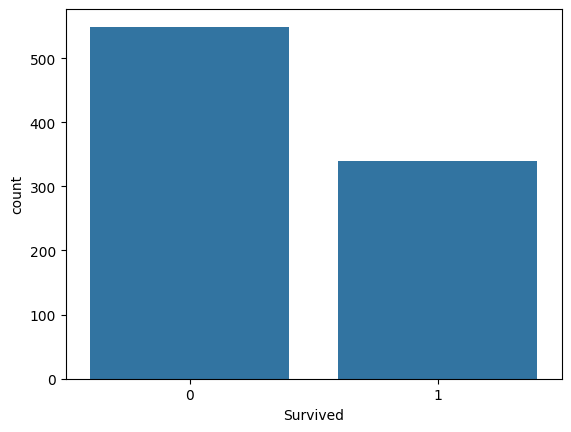

In [67]:
sns.countplot(x='Survived',data=tsp)

<Axes: xlabel='Sex', ylabel='count'>

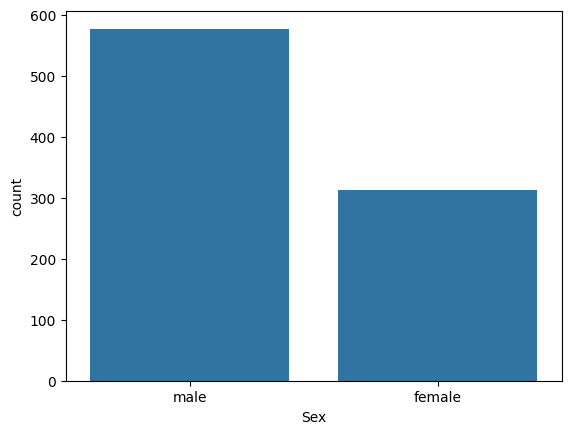

In [68]:
sns.countplot(x='Sex',data=tsp)

<Axes: xlabel='Pclass', ylabel='count'>

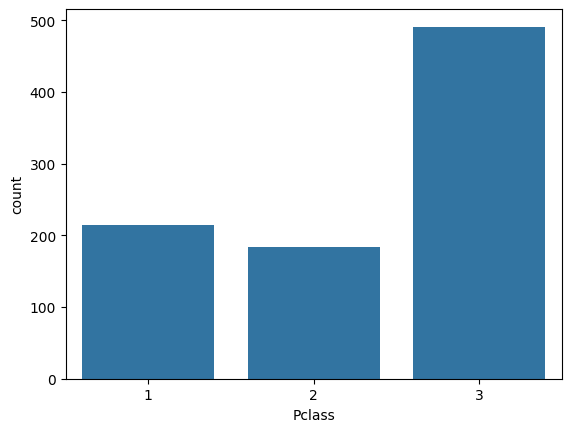

In [69]:
sns.countplot(x='Pclass',data=tsp)

<Axes: xlabel='Sex', ylabel='count'>

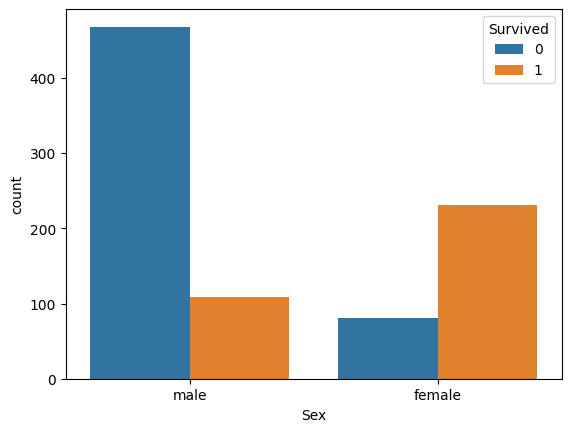

In [70]:
sns.countplot(x='Sex',hue='Survived',data=tsp)

<Axes: xlabel='Pclass', ylabel='count'>

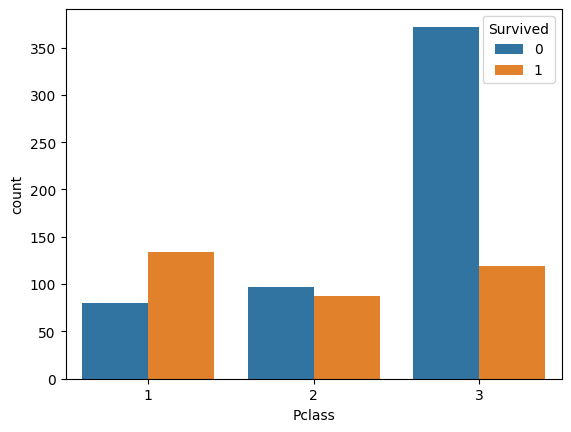

In [71]:
sns.countplot(x='Pclass',hue='Survived',data=tsp)

In [72]:
tsp['Name'].value_counts()

,count
Name,
"Braund, Mr. Owen Harris",1
"Boulos, Mr. Hanna",1
"Frolicher-Stehli, Mr. Maxmillian",1
"Gilinski, Mr. Eliezer",1
"Murdlin, Mr. Joseph",1
...,...
"McCoy, Mr. Bernard",1
"Johnson, Mr. William Cahoone Jr",1
"Keane, Miss. Nora A",1


In [73]:
tsp['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [74]:
tsp['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [75]:
tsp.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [77]:
x = tsp.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

In [78]:
print(x)

     Pclass  Sex  SibSp  Parch     Fare  Embarked
0         3    0      1      0   7.2500         0
1         1    1      1      0  71.2833         1
2         3    1      0      0   7.9250         0
3         1    1      1      0  53.1000         0
4         3    0      0      0   8.0500         0
..      ...  ...    ...    ...      ...       ...
886       2    0      0      0  13.0000         0
887       1    1      0      0  30.0000         0
888       3    1      1      2  23.4500         0
889       1    0      0      0  30.0000         1
890       3    0      0      0   7.7500         2

[889 rows x 6 columns]


In [81]:
y = tsp['Survived']

In [82]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
print(x_train)

     Pclass  Sex  SibSp  Parch      Fare  Embarked
708       1    1      0      0  151.5500         0
240       3    1      1      0   14.4542         1
382       3    0      0      0    7.9250         0
792       3    1      8      2   69.5500         0
683       3    0      5      2   46.9000         0
..      ...  ...    ...    ...       ...       ...
107       3    0      0      0    7.7750         0
271       3    0      0      0    0.0000         0
862       1    1      0      0   25.9292         0
436       3    1      2      2   34.3750         0
103       3    0      0      0    8.6542         0

[711 rows x 6 columns]


In [86]:
print(x_test)

     Pclass  Sex  SibSp  Parch      Fare  Embarked
281       3    0      0      0    7.8542         0
435       1    1      1      2  120.0000         0
39        3    1      1      0   11.2417         1
418       2    0      0      0   13.0000         0
585       1    1      0      2   79.6500         0
..      ...  ...    ...    ...       ...       ...
433       3    0      0      0    7.1250         0
807       3    1      0      0    7.7750         0
25        3    1      1      5   31.3875         0
85        3    1      3      0   15.8500         0
10        3    1      1      1   16.7000         0

[178 rows x 6 columns]


In [87]:
print(y_train)

708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64


In [89]:
print(y_test)

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64


In [90]:
log=LogisticRegression()

In [91]:
log.fit(x_train,y_train)

LogisticRegression()

In [92]:
x_train_predict=log.predict(x_train)

In [93]:
print(x_train_predict)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 

In [99]:
y_pred=log.predict(x_test)

In [97]:
y_test.value_counts()

,count
Survived,
0,109
1,69


In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [129]:
training_data_accuracy = accuracy_score(y_train, x_train_predict)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7946554149085795


In [123]:
x_test_predict=log.predict(x_test)

In [124]:
print(x_test_predict)

[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1]


In [126]:
test_data_accuracy = accuracy_score(y_test, x_test_predict)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.8033707865168539
